Name: __________________        Class: __________________     Date: __________________

![aplogo](https://raw.githubusercontent.com/astroDimitrios/AstronomyClass/master/DesignAssets/Ai/Banner3plainCut.png)

# Plotting data with Pandas and Matplotlib

### AIM - To introduce students to Pandas and Matplotlib
Difficulty: Easy

## Start:

This activity will see you plotting some data from NASA about the planets and some moons in our solar system. 

Again if you are stuck you can consult the Python and NumPy docs at https://docs.python.org/3/, and https://numpy.org/doc/stable/, find help from one of these websites www.w3schools.com, www.python.org, www.learnpython.org (great intro lessons here) or you can also get advice from www.stackoverflow.com.

This interactive notebook is part of a series which can be found here: https://github.com/AstroDimitrios/Astronomy.  
The notebook is distributed by Dimitrios Theodorakis under the GNU General Public License v3.0.    
If something is not working right or you have questions/suggestions about these notebooks please email me at astrodimitrios@gmail.com. Inspiration was taken from the Exoplanet Transit Lab from the Dominion Astrophysical Observatory, Canada here: https://centreoftheuniverse.org/transit-lab, and the work of Adam LaMee's Coding in K12 here: https://adamlamee.github.io/.

## Contents

* [Start](#Start)
* [Matplotlib for plotting](#MPLOT)
* [Over to You](#OTY)


## Let's Go: <a class="anchor" id="Start"></a>



$$U(r) = -\frac{GMm}{r}$$

In [1]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib widget

In [4]:
G = 6.67408*10**-11 # m^3 kg^-1 s^-2
AU = 1.495978707*10**11 # m

In [5]:
r = np.arange(0.9, 1.1, 0.01) # distances in AU
r

array([0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ,
       1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 ])

In [6]:
earth_d = 1 # Average dist from Sun in AU
earth_M = 5.972*10**24 # Earth mass in kg

In [7]:
U = -G*earth_M/(abs(r-earth_d)*AU)
U

C:\Users\polyq\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ -26643.16381877,  -29603.51535419,  -33303.95477347,
        -38061.66259825,  -44405.27303129,  -53286.32763755,
        -66607.90954694,  -88810.54606258, -133215.81909387,
       -266431.63818775,             -inf, -266431.63818774,
       -133215.81909387,  -88810.54606258,  -66607.90954694,
        -53286.32763755,  -44405.27303129,  -38061.66259825,
        -33303.95477347,  -29603.51535419,  -26643.16381877])

In [8]:
fig = plt.figure(num=1, figsize=(6, 4))
ax = fig.add_subplot(111, label="ax")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

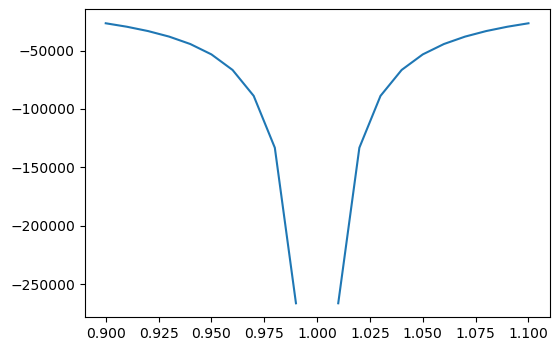

In [9]:
plt.gcf()
ax.plot(r,U)
fig

In [10]:
def U_1D(points, planet_d, planet_R, planet_M):
    """ Calculate the gravitational potential near a planet.
    
    Arguments:
        points -- 1D NumPy Array of distance points in AU
        planet_d -- float, distance of planet from origin in AU
        planet_R -- float, radius of planet in km
        planet_M -- float, mass of the planet in kg
    
    Returns:
        U -- NumPy Array of potentials same shape as points, in J/Kg
    """

    G = 6.67408*10**-11       # m^3 kg^-1 s^-2
    AU = 1.495978707*10**11   # AU in m
    
    points = points*AU        # from AU to m
    d = planet_d*AU           # from AU to m
    R = planet_R*1000         # from km to m
    U1 = np.zeros(points.shape)

    for i, point in enumerate(points):
        r = abs(point-d)
        if r <= R:
            U1[i] = G*planet_M*(r**2-3*R**2)/(2*R**3)
        else:
            U1[i] = -G*planet_M/r
    return U1

In [11]:
earth_R = 6371 # km
r_new = np.arange(0.999, 1.001, 0.000001)
U_new = U_1D(r_new, earth_d, earth_R, earth_M)
U_new[0:5]

array([-2664316.38187727, -2666983.365243  , -2669655.69326423,
       -2672333.38202372, -2675016.44766827])

In [12]:
plt.clf()

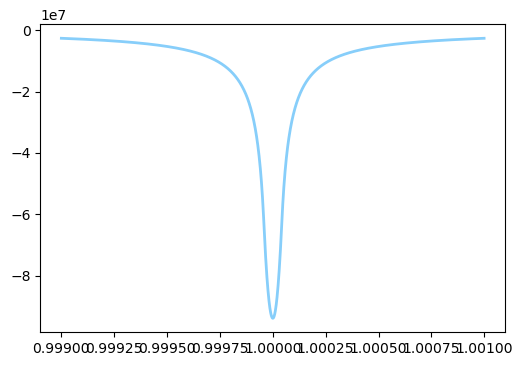

In [13]:
fig = plt.figure(num=1, figsize=(6, 4))
ax = fig.add_subplot(111, label="ax")

ax.plot(r_new, U_new, c='lightskyblue', label='Earth Potential', linewidth=2)
fig

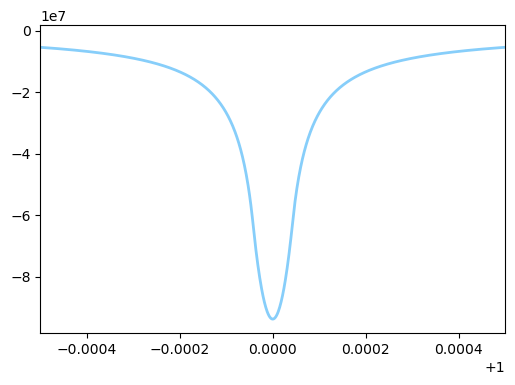

In [14]:
ax.set_xlim(0.9995, 1.0005)
fig

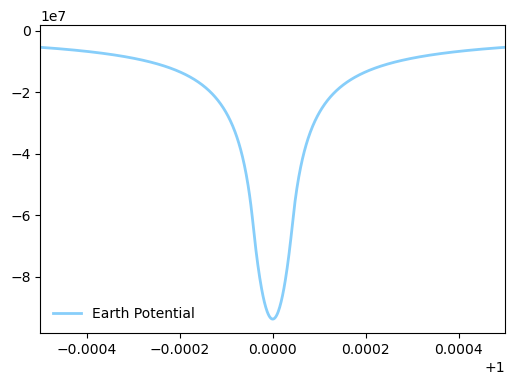

In [15]:
ax.legend(frameon=False)
fig

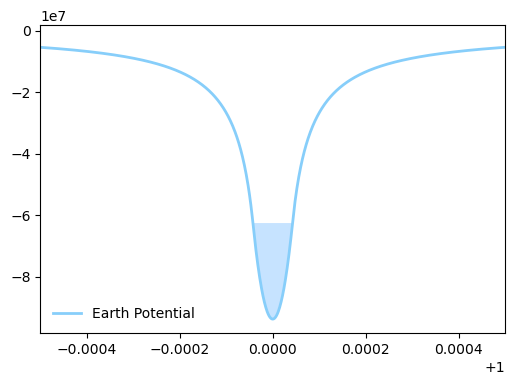

In [16]:
earth_surface = np.full(r_new.shape, -G*earth_M/(earth_R*1000))
up_lim = earth_d+earth_R*1000/AU
low_lim = earth_d-earth_R*1000/AU
cut = np.where((r_new<up_lim)&(r_new>low_lim), True, False)
ax.fill_between(r_new, U_new, earth_surface,  where=cut, color='dodgerblue', ec='None', alpha=.25, zorder=-1)
fig

In [17]:
print(-G*earth_M/(earth_R*1000))

-62560988.47904567


https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html

In [18]:
from matplotlib.ticker import FormatStrFormatter

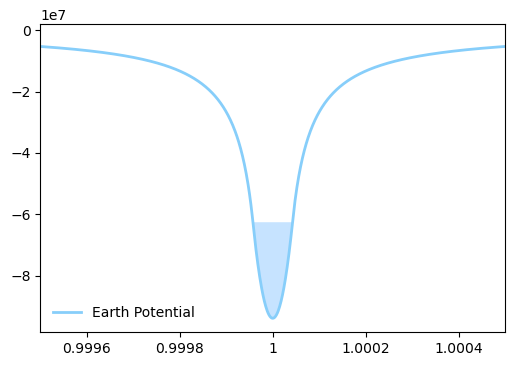

In [19]:
ax.xaxis.set_major_formatter(FormatStrFormatter('%g'))
fig

In [20]:
xlabels = np.rint((r_new-earth_d)*AU/1000).astype(int) # km
xlabels

array([-149598, -149448, -149299, ...,  149149,  149299,  149448])

C:\Users\polyq\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


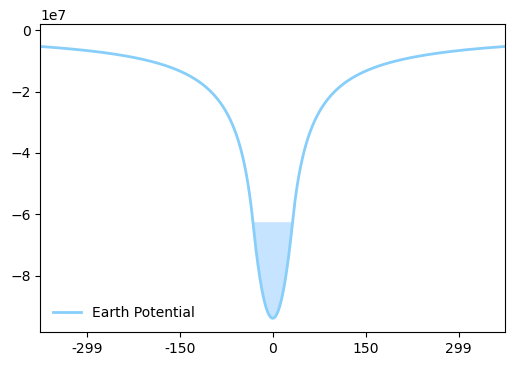

In [21]:
ind = np.where(xlabels==0)[0][0]
ax.set_xticklabels(xlabels[ind-3:ind+3])
fig

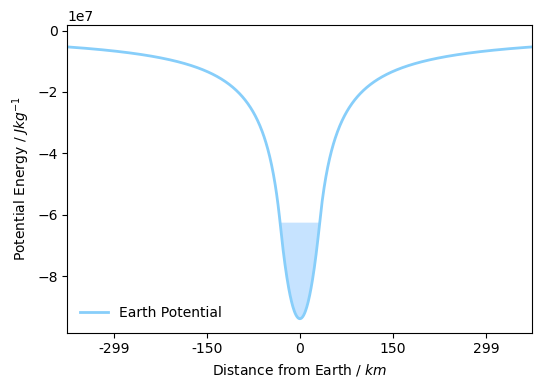

In [22]:
ax.set_xlabel(r'Distance from Earth / $km$')
ax.set_ylabel(r'Potential Energy / $Jkg^{-1}$')
fig

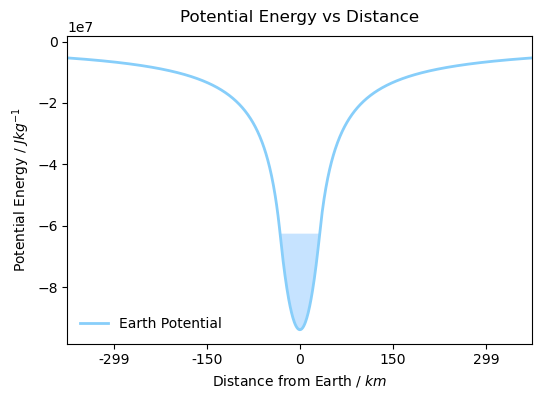

In [23]:
ax.set_title('Potential Energy vs Distance', pad=10)
fig

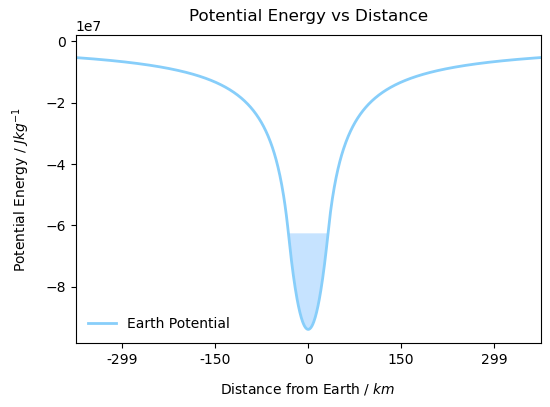

In [24]:
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
fig

In [25]:
x = np.arange(-50000, 50000, 10.)
y = np.arange(-50000, 50000, 10.)

In [26]:
xx, yy = np.meshgrid(x, y)
xx

array([[-50000., -49990., -49980., ...,  49970.,  49980.,  49990.],
       [-50000., -49990., -49980., ...,  49970.,  49980.,  49990.],
       [-50000., -49990., -49980., ...,  49970.,  49980.,  49990.],
       ...,
       [-50000., -49990., -49980., ...,  49970.,  49980.,  49990.],
       [-50000., -49990., -49980., ...,  49970.,  49980.,  49990.],
       [-50000., -49990., -49980., ...,  49970.,  49980.,  49990.]])

In [27]:
def U_2D(points, planet_d, planet_M):
    """ Calculate the gravitational potential near a planet.
    
    Arguments:
        points -- tuple containing xx and yy meshgrid arrays of distance points in km
        planet_d -- float, distance of planet from origin in AU
        planet_R -- float, radius of planet in km
        planet_M -- float, mass of the planet in kg
    
    Returns:
        U -- NumPy Array of potentials same shape as points, in J/Kg
    """

    G = 6.67408*10**-11       # m^3 kg^-1 s^-2
    AU = 1.495978707*10**11   # AU in m
    
    x, y = points
    x = x*1000
    y = y*1000
    dx, dy = planet_d         # from AU to m
    dx = dx*AU
    dy = dy*AU
#     R = planet_R*1000         # from km to m
    dists = np.hypot(x-dx, y-dy)
    U = -G*planet_M/dists
#     print(dists)
#     print(-G*planet_M/dists[0][0])
#     print(planet_M)
    
    return U

In [28]:
U_2 = U_2D((xx, yy), (0,0), earth_M)
U_2

C:\Users\polyq\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide


array([[-5636716.6629512 , -5637280.36279826, -5637844.11899556, ...,
        -5638407.93152616, -5637844.11899556, -5637280.36279826],
       [-5637280.36279826, -5637844.23179756, -5638408.15719786, ...,
        -5638972.13898222, -5638408.15719786, -5637844.23179756],
       [-5637844.11899556, -5638408.15719786, -5638972.25185194, ...,
        -5639536.40294088, -5638972.25185194, -5638408.15719786],
       ...,
       [-5638407.93152616, -5638972.13898222, -5639536.40294088, ...,
        -5640100.72338523, -5639536.40294088, -5638972.13898222],
       [-5637844.11899556, -5638408.15719786, -5638972.25185194, ...,
        -5639536.40294088, -5638972.25185194, -5638408.15719786],
       [-5637280.36279826, -5637844.23179756, -5638408.15719786, ...,
        -5638972.13898222, -5638408.15719786, -5637844.23179756]])

In [29]:
from numpy import inf
U_2[U_2 == -inf] = -62560988.47904567

In [30]:
fig2 = plt.figure(num=2, figsize=(10, 10))
ax2 = fig2.add_subplot(111, label="ax")
im = plt.imshow(U_2, origin='lower', interpolation='none')
cbar = plt.colorbar(im, fraction=0.0455, pad=0.04)
cbar.outline.set_visible(False)
plt.clim(-62560988.47904567,0)
ax2.set_title(r'Potential Energy in $Jkg^{-1}$', pad=10)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'Potential Energy in $Jkg^{-1}$')

In [31]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

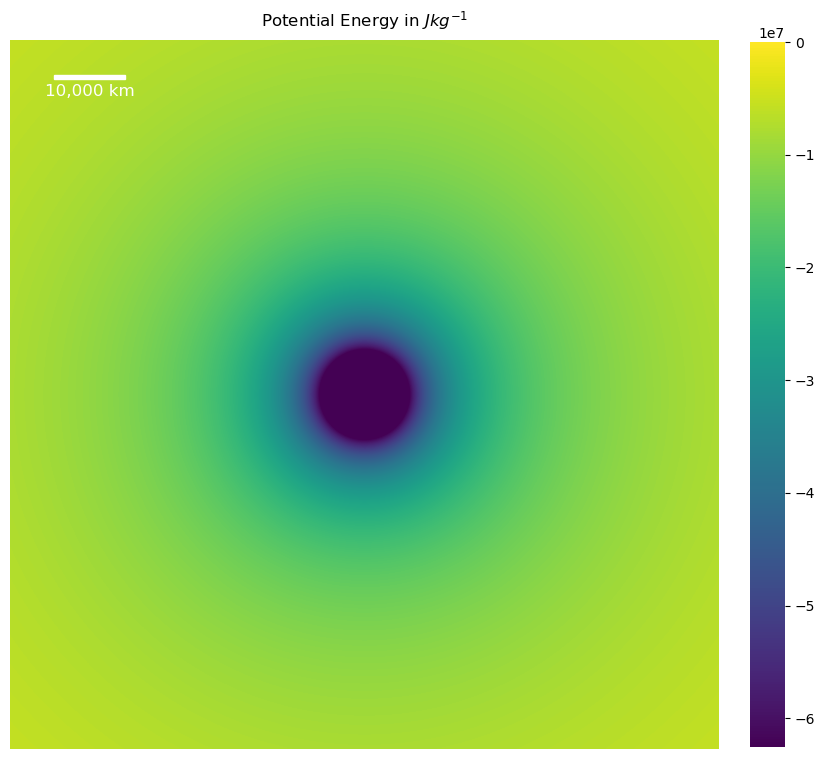

In [32]:
fontprops = fm.FontProperties(size=12)

scalebar = AnchoredSizeBar(ax2.transData,
                           1000, '10,000 km', 'upper left', 
                           pad = 0.1,
                           color = 'white',
                           frameon = False,
                           size_vertical = 50,
                           borderpad = 2,
                           sep = 4,
                           fontproperties = fontprops)

ax2.add_artist(scalebar)
ax2.axis('off')
fig2

In [33]:
fig3 = plt.figure(num=3, figsize=(10, 10))
ax3 = fig3.add_subplot(111, label="ax")

levels = np.linspace(-62560988.47904567/10**6, 0, 10)
CS = ax3.contour(xx, yy, U_2/10**6, vmax=0, vmin=-62560988.47904567/10**6, levels=levels)
ax3.clabel(CS, inline=1, fontsize=10, fmt='%.2f')
ax3.set_title(r'Potential Energy in $MJkg^{-1}$', pad=10)
ax3.set_xlabel(r'x-Distance from Earth / $km$', labelpad=20)
ax3.set_ylabel(r'y-Distance from Earth / $km$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'y-Distance from Earth / $km$')

In [34]:
fig4 = plt.figure(num=4, figsize=(10,10))
ax4 = fig4.gca(projection='3d')
U_2[U_2 < -62560988.47904567] = -62560988.47904567
surf = ax4.plot_surface(xx, yy, U_2/10**6, cmap='viridis',
                       linewidth=0, antialiased=True,
                       vmax=0, vmin=-62560988.47904567/10**6)
fig4.colorbar(surf, shrink=0.5, aspect=5)
ax4.set_zlim3d(-62560988.47904567/10**6, 0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-62.56098847904567, 0.0)

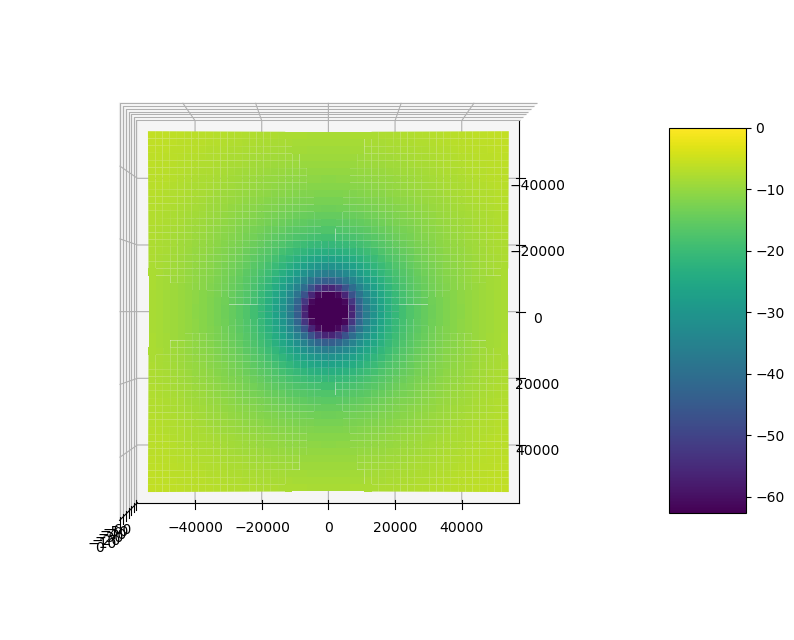

In [35]:
ax4.azim = 0  # def -60
ax4.dist = 10 # def 10
ax4.elev = 90 # def 30
fig4

https://stackoverflow.com/questions/12904912/how-to-set-camera-position-for-3d-plots-using-python-matplotlib

https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/

https://matplotlib.org/stable/contents.html

https://xkcd.com/681_large/

https://matplotlib.org/stable/api/index.html

https://en.wikipedia.org/wiki/Gravitational_potential